In [120]:
# Keras
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd, path
from pathlib import Path

# Import the dataset

In [140]:
def get_images(dir_name):
    dataset_dir = path.join(Path(getcwd()).parents[1], 'dataset', dir_name)
    return keras.preprocessing.image_dataset_from_directory(
                                                            dataset_dir,
                                                            labels='inferred',
                                                            label_mode='int',
                                                            shuffle=True)

train_ds = get_images('train')
train_label = np.concatenate([y for _, y in train_ds], axis=0, dtype=int)

test_ds = get_images('test')
test_label = np.concatenate([y for _, y in test_ds], axis=0, dtype=int)

Found 1756 files belonging to 5 classes.
Found 441 files belonging to 5 classes.


In [126]:
class_names = sorted([ 'closterium', 'microcystis', 'nitzschia', 'non-algae', 'oscillatoria' ])

# Visualize the dataset

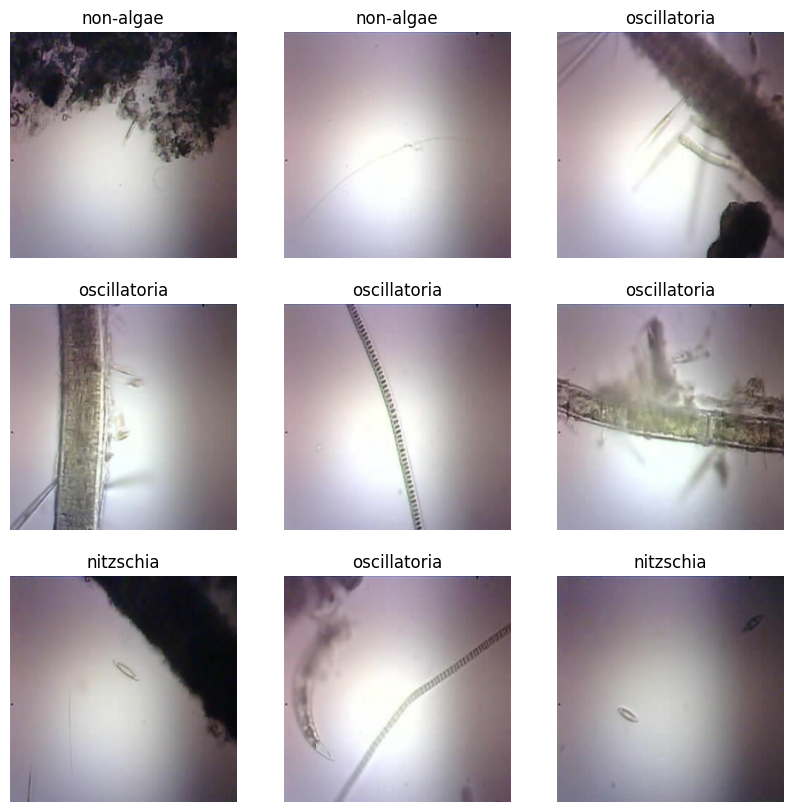

In [147]:
plt.figure(figsize=(10, 10))
count = 0
for image_batch, label_batch in train_ds:
  for i, image in enumerate(image_batch):
    if count == 9:
      break
    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

    count += 1

# Build the model

In [149]:
num_classes = len(class_names)

model = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

# Compile the model

In [150]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary

In [151]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 256, 256, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_30 (Conv2D)              │ (None, 256, 256, 16)      │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 128, 128, 16)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 32)      │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 64, 64, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 32, 32, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_17 (Flatten)            │ (None, 65536)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_32 (Dense)                │ (None, 128)               │  8,388,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_33 (Dense)                │ (None, 5)                 │        645 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 8,412,965 (32.09 MB)

 Trainable params: 8,412,965 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [154]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10
)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.6271 - loss: 0.9535 - val_accuracy: 0.5283 - val_loss: 1.0954
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.6922 - loss: 0.7884 - val_accuracy: 0.6032 - val_loss: 1.0531
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.7240 - loss: 0.7346 - val_accuracy: 0.6508 - val_loss: 1.0276
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.7817 - loss: 0.5870 - val_accuracy: 0.6553 - val_loss: 1.0164
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.8246 - loss: 0.5109 - val_accuracy: 0.6825 - val_loss: 1.0417
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.8369 - loss: 0.4485 - val_accuracy: 0.6848 - val_loss: 1.1094
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.8707 - loss: 0.3495 - val_accuracy: 0.6803 - val_loss: 1.0455
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.8958 - loss: 0.3019 - val_accuracy: 0.

# Evaluate accuracy

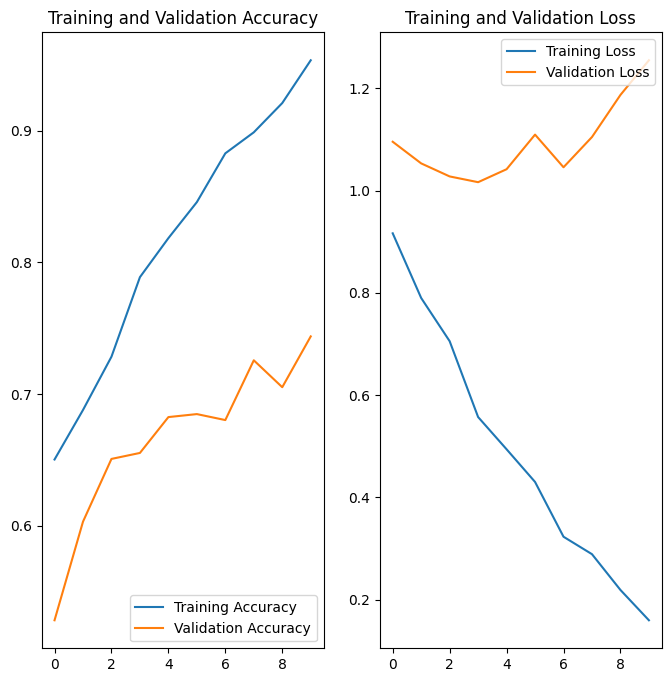

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()